In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv("hacktrain.csv")
df #ignore the warnings

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [3]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,560
20150602_N,1200
20150517_N,800
20150501_N,960
20150415_N,480
20150330_N,1120
20150314_N,720


In [4]:
df.fillna(df.mean(numeric_only=True), inplace=True) #simple mean imputation [This part has a lot of scope for imporovement.]
#keep in mind that the data is inherently noisy and the test dataset is not.
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,0
20150602_N,0
20150517_N,0
20150501_N,0
20150415_N,0
20150330_N,0
20150314_N,0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        farm       0.72      0.74      0.73       168
      forest       0.99      0.91      0.95      1232
       grass       0.56      0.77      0.65        39
  impervious       0.72      0.86      0.78       134
     orchard       0.26      0.83      0.40         6
       water       0.27      0.76      0.40        21

    accuracy                           0.89      1600
   macro avg       0.59      0.81      0.65      1600
weighted avg       0.92      0.89      0.90      1600



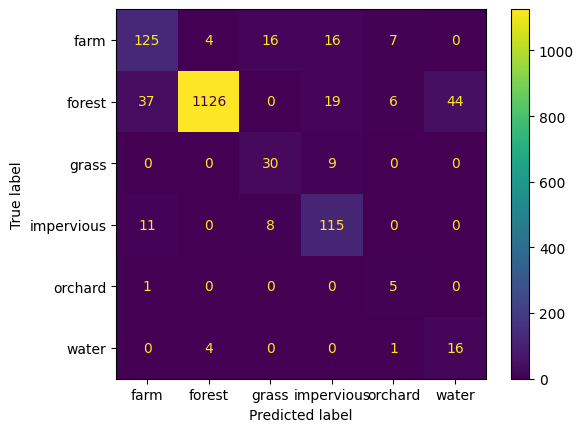

In [5]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 0. Load Dataset
df = pd.read_csv('hacktrain.csv')  # Replace with actual filename

# 1. Prepare Features and Target
X = df.drop(columns=['class'])
y = df['class']

# 2. Denoising
X = X.select_dtypes(include=['int64', 'float64'])
X = X.loc[:, X.var() > 0]

# 3. Imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Feature Selection
selector = SelectKBest(score_func=f_classif, k='all')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# 7. SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_selected, y_train)

# 8. Logistic Regression (Plain, No GridSearch)
model = LogisticRegression(
    max_iter=1000,
    penalty='l2',
    solver='lbfgs',
    #solver='liblinear',
    multi_class='ovr',
    class_weight='balanced'  # Optional — test both
)
model.fit(X_resampled, y_resampled)

# 9. Evaluation
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        farm       0.44      0.60      0.51       168
      forest       0.96      0.67      0.79      1232
       grass       0.16      0.72      0.26        39
  impervious       0.64      0.74      0.69       134
     orchard       0.06      0.83      0.11         6
       water       0.17      0.67      0.27        21

    accuracy                           0.67      1600
   macro avg       0.40      0.71      0.44      1600
weighted avg       0.84      0.67      0.73      1600



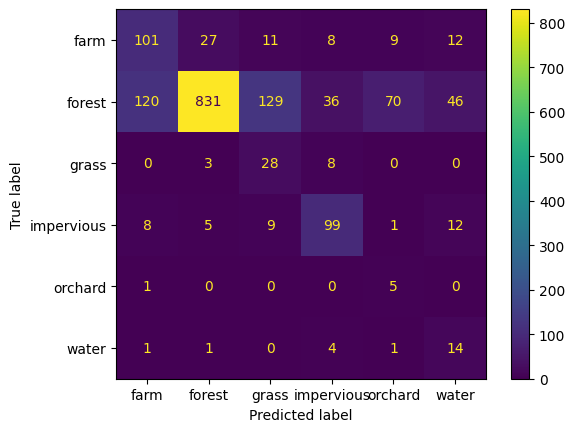

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 0. Load Dataset
df = pd.read_csv('hacktrain.csv')

# 1. Prepare Features and Target
X = df.drop(columns=['class'])
y = df['class']

# Drop 'Unnamed: 0' and 'ID' from features before further processing
X = X.drop(columns=['Unnamed: 0', 'ID'])

# 2. Denoising: Drop non-numeric and low-variance cols
X = X.select_dtypes(include=['int64', 'float64'])
X = X.loc[:, X.var() > 0]


# 3. Train-Test Split BEFORE transformation
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Imputation
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_raw), columns=X_train_raw.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_raw), columns=X_test_raw.columns)

# 5. Scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)

# 6. Feature Selection
selector = SelectKBest(score_func=f_classif, k='all')  # or choose 'k=20' for top 20 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# 7. SMOTE (handle imbalance)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_selected, y_train)

# 8. Logistic Regression
model = LogisticRegression(
    max_iter=1000,
    penalty='l2',
    solver='lbfgs',
    multi_class='ovr',
    class_weight='balanced'
)
model.fit(X_resampled, y_resampled)

# 9. Evaluation
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best C: {'C': 5.0}
              precision    recall  f1-score   support

        farm       0.86      0.78      0.82       168
      forest       0.99      0.99      0.99      1232
       grass       0.77      0.69      0.73        39
  impervious       0.85      0.87      0.86       134
     orchard       0.22      0.67      0.33         6
       water       0.73      0.90      0.81        21

    accuracy                           0.95      1600
   macro avg       0.74      0.82      0.76      1600
weighted avg       0.96      0.95      0.95      1600



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        farm       0.87      0.79      0.83       168
      forest       0.99      0.99      0.99      1232
       grass       0.75      0.69      0.72        39
  impervious       0.85      0.86      0.86       134
     orchard       0.25      0.67      0.36         6
       water       0.73      0.90      0.81        21

    accuracy                           0.95      1600
   macro avg       0.74      0.82      0.76      1600
weighted avg       0.96      0.95      0.95      1600



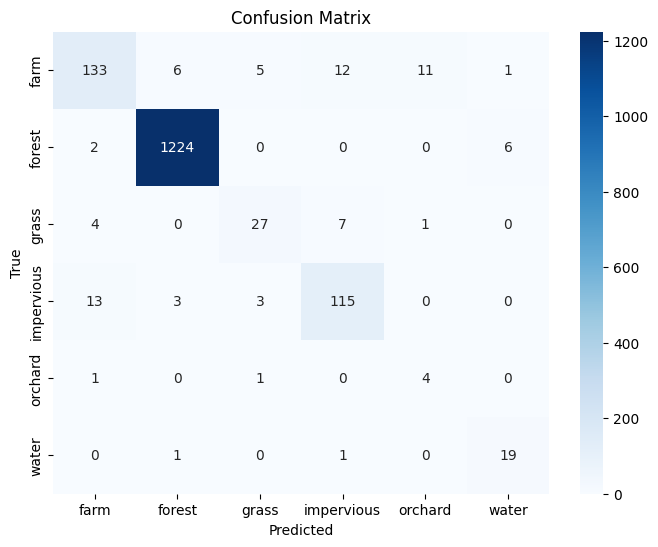

              precision    recall  f1-score   support

        farm       0.87      0.79      0.83       168
      forest       0.99      0.99      0.99      1232
       grass       0.75      0.69      0.72        39
  impervious       0.85      0.86      0.86       134
     orchard       0.25      0.67      0.36         6
       water       0.73      0.90      0.81        21

    accuracy                           0.95      1600
   macro avg       0.74      0.82      0.76      1600
weighted avg       0.96      0.95      0.95      1600



In [10]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# from imblearn.over_sampling import SMOTE

#feature engineering
ndvi_columns = [col for col in df.columns if '_N' in col]  # NDVI time series columns
 # NDVI denoising function
def denoise_ndvi(data, ndvi_cols):
    data[ndvi_cols] = data[ndvi_cols].clip(lower=-1.0, upper=1.0)
    data[ndvi_cols] = data[ndvi_cols].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
    return data

def add_ndvi_features(data):
    data['ndvi_mean'] = data[ndvi_columns].mean(axis=1)
    data['ndvi_std'] = data[ndvi_columns].std(axis=1)
    data['ndvi_min'] = data[ndvi_columns].min(axis=1)
    data['ndvi_max'] = data[ndvi_columns].max(axis=1)
    data['ndvi_range'] = data['ndvi_max'] - data['ndvi_min']
    data['ndvi_median'] = data[ndvi_columns].median(axis=1)
    data['ndvi_q25'] = data[ndvi_columns].quantile(0.25, axis=1)
    data['ndvi_q75'] = data[ndvi_columns].quantile(0.75, axis=1)
    data['ndvi_iqr'] = data['ndvi_q75'] - data['ndvi_q25']
    data['ndvi_trend'] = data[ndvi_columns].apply(lambda x: np.polyfit(range(len(x)), x, 1)[0] if not np.isnan(x).all() else np.nan, axis=1)
    # Early/Mid/Late season means
    data['ndvi_early'] = data[ndvi_columns[:9]].mean(axis=1)
    data['ndvi_mid']   = data[ndvi_columns[9:18]].mean(axis=1)
    data['ndvi_late']  = data[ndvi_columns[18:]].mean(axis=1)

    # Seasonal difference
    data['ndvi_seasonal_diff'] = data['ndvi_late'] - data['ndvi_early']

    return data, ndvi_columns

#preprocessing
def preprocess_data(df, ndvi_columns, drop_id=True):
    df = df.copy()
    df.drop(columns=ndvi_columns, inplace=True)
    if drop_id and 'ID' in df.columns:
        df.drop(columns=['ID'], inplace=True)
    return df

# df = add_ndvi_features(df)

# #  Drop original NDVI time-series columns to avoid overfitting
# df.drop(columns=ndvi_columns, inplace=True)


# # Drop ID column
# df.drop(columns=['ID'], inplace=True)

#evaluate
def evaluate_model(y_true, y_pred, label_names):
    print(classification_report(y_true, y_pred, target_names=label_names))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()



df = pd.read_csv("hacktrain.csv")  # replace with your training file
df, ndvi_columns = add_ndvi_features(df)
df = preprocess_data(df, ndvi_columns)

# Encode class labels
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Features/target
X = df.drop(columns=['class'])
y = df['class']

# # Encode class column (if it's categorical)
# label_encoder = LabelEncoder()
# df['class'] = label_encoder.fit_transform(df['class'])

# # Split into features and target
# X = df.drop(columns=['class'])
# y = df['class']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y)


# # Imputer for missing values (mean)
# imputer = SimpleImputer(strategy='median')
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


# # --- SMOTE on training data only ---
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_smote)
# X_test_scaled = scaler.transform(X_test_imputed)

# # Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_imputed)
# X_test_scaled = scaler.transform(X_test_imputed)



class_weights = {
    0: 1.0,   # farm
    1: 1.0,   # forest
    2: 2.0,   # grass
    3: 1.5,   # impervious
    4: 10.0,   # orchard (reduced from 5.5)
    5: 9.0    # water (reduced from 2.5)
}

#Logistic Regression with Grid Search
param_grid = {'C': [0.1, 0.5, 1.0, 2.0, 5.0]}
model = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight=class_weights, max_iter=200), param_grid, cv=3)
model.fit(X_train_scaled,y_train)

# Evaluation
y_pred = model.predict(X_test_scaled)
print("Best C:", model.best_params_)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Fit multinomial logistic regression
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=200,
    #class_weight='balanced',
    class_weight=class_weights,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)
evaluate_model(y_test, y_pred, label_encoder.classes_)
# Classification report with all original class labels
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))

In [11]:
# Load test data
test_data = pd.read_csv("hacktest.csv")
ID = test_data['ID']
test_data.drop(['ID'], axis=1, inplace=True)

In [12]:
test_data, _ = add_ndvi_features(test_data)
test_data.drop(columns=ndvi_columns, inplace=True)
test_data = test_data[X.columns.tolist()]

In [13]:
test_data = imputer.transform(test_data)
test_data = scaler.transform(test_data)

In [14]:
# Predict test labels
y_test_final = model.predict(test_data)
y_decoded = label_encoder.inverse_transform(y_test_final)


In [15]:
# Save to submission.csv
submission = pd.DataFrame({'ID': ID, 'class': y_decoded})
submission.to_csv("submission.csv", index=False)

In [16]:
# Load test data
test_data = pd.read_csv("hacktest.csv")
ID = test_data['ID']
test_data.drop(['ID'], axis=1, inplace=True)
test_data, _ = add_ndvi_features(test_data)
test_data.drop(columns=ndvi_columns, inplace=True)
test_data = test_data[X.columns.tolist()]
test_data = imputer.transform(test_data)
test_data = scaler.transform(test_data)

# Predict test labels
y_test_final = model.predict(test_data)
y_decoded = label_encoder.inverse_transform(y_test_final)

# Save to submission.csv
submission = pd.DataFrame({'ID': ID, 'class': y_decoded})
submission.to_csv("submission.csv", index=False)

In [17]:
test_data = pd.read_csv("hacktest.csv")
ID = test_data['ID']
test_data, _ = add_ndvi_features(test_data)
test_data = preprocess_data(test_data, ndvi_columns, drop_id=False)

test_data = test_data[X.columns]  # same features as training

test_imputed = imputer.transform(test_data)
test_scaled = scaler.transform(test_imputed)

y_test_final = model.predict(test_scaled)
y_decoded = label_encoder.inverse_transform(y_test_final)

result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})
result.to_csv("submission.csv", index=False)
print(" Submission file saved: submission.csv")


✅ Submission file saved: submission.csv


In [18]:
result.to_csv("submission.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file

In [19]:
result.to_csv("submission.csv", index=False)
result


,ID,class
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,water


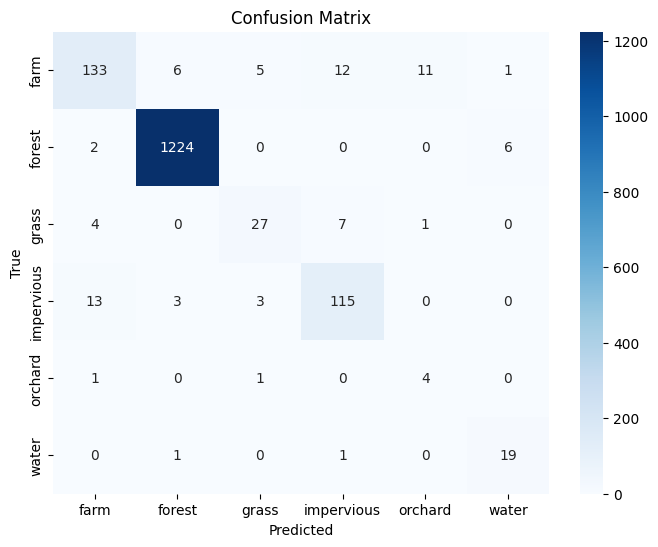

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
test_data = pd.read_csv("hacktest.csv")
test_data.shape

(2845, 29)

In [22]:
ID = test_data['ID'].copy()

In [23]:
ID = test_data['ID']
test_data.drop(['ID'], axis=1, inplace=True)

In [24]:
test_data = add_ndvi_features(test_data)

In [28]:
# Predict on test data
y_test_final = model.predict(test_scaled)
y_decoded = label_encoder.inverse_transform(y_test_final)

In [29]:
print(len(ID), len(y_decoded))

2845 2845


In [30]:
y_test_final

array([1, 1, 1, ..., 5, 5, 5])

In [31]:

y_decoded

array(['forest', 'forest', 'forest', ..., 'water', 'water', 'water'],
      dtype=object)

In [32]:
print("Length of ID:", len(ID))
print("Length of y_decoded:", len(y_decoded))

Length of ID: 2845
Length of y_decoded: 2845


In [33]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

In [34]:
result

,ID,class
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest
...,...,...
2840,2841,water
2841,2842,water
2842,2843,water
2843,2844,water


In [ ]:
result.to_csv("submission.csv", index=False) #this file will appear under the output section of the right navbar. You need to submit this csv file